In [34]:
import numpy as np
import scipy.linalg
import matplotlib

In [53]:
# f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
def f(x):
    return np.sin(x / 5.0) * np.exp( x / 10.0 ) + 5 * np.exp( -x / 2.0 )

In [54]:
p1 =[1, 15]
p2 =[1, 8, 15]
p3 =[1, 4, 10 , 15]

In [55]:
def build_matrix(points, func):
    m = np.empty((len(points), len(points)))
    res = np.empty(len(points))
    for i in range(0,len(points)):
        for j in range(0,len(points)):
            m[i,j] = points[i] ** j
        res[i] = func(points[i])
    return m, res

In [56]:
m1, f1 = build_matrix(p1, f)
m2, f2 = build_matrix(p2, f)
m3, f3 = build_matrix(p3, f)

In [57]:
w1 = scipy.linalg.solve(m1,f1)

In [58]:
w2 = scipy.linalg.solve(m2,f2)

In [59]:
w3 = scipy.linalg.solve(m3,f3)

In [60]:
print("{0:.2f} {1:.2f} {2:.2f} {3:.2f}".format(*w3))

4.36 -1.30 0.19 -0.01


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import interpolate

In [62]:
def poly(w,x):
    res = 0
    for i in range(0,len(w)):
        res += w[i]*(x**i)
    return res

In [70]:
x = np.arange(0,16,0.1)

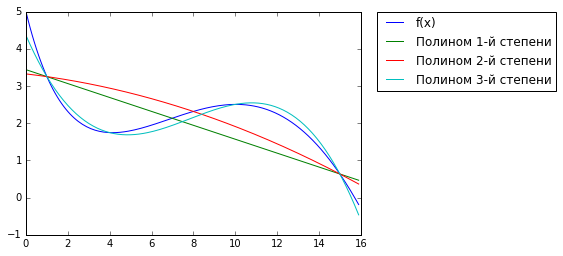

In [79]:
plt.plot(x,f(x), label='f(x)')
plt.plot(x,poly(w1,x), label=u'Полином 1-й степени')
plt.plot(x,poly(w2,x), label=u'Полином 2-й степени')
plt.plot(x,poly(w3,x), label=u'Полином 3-й степени')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)